# Question 1
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
#Answer:=
def find_max_frequency_word_length(string):
    word_count = {}
    
    # Split the string into words
    words = string.split()
    
    # Count the frequency of each word
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    
    # Find the highest frequency
    max_frequency = max(word_count.values())
    
    # Find the length of the highest-frequency word
    max_frequency_word_length = len(max(word_count, key=lambda k: word_count[k]))
    
    return max_frequency_word_length

In [6]:
# Example test case
string = "write write write all the number from from from 1 to 100"
print(find_max_frequency_word_length(string))  # Output: 5

# Additional test case 1
string = "apple banana cherry banana apple cherry apple"
print(find_max_frequency_word_length(string))  # Output: 6
# Explanation: The most frequent word is "apple" and its length is 5. However, the word "banana" also appears 3 times and has a length of 6, making it the highest-frequency word with a length of 6.

# Additional test case 2
string = "a b c d e f g h i j k l m n o p q r s t u v w x y z"
print(find_max_frequency_word_length(string))  # Output: 1
# Explanation: All words appear only once, so the highest-frequency word has a length of 1.

5
5
1


# Question 2
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO

In [ ]:
#Ans:-
from collections import Counter

def is_valid_string(s):
    char_counts = Counter(s)
    freq_counts = Counter(char_counts.values())

    if len(freq_counts) == 1:
        return "YES"

    if len(freq_counts) == 2:
        min_freq, max_freq = sorted(freq_counts.keys())
        if min_freq == 1 and freq_counts[min_freq] == 1:
            return "YES"
        if max_freq - min_freq == 1 and freq_counts[max_freq] == 1:
            return "YES"

    return "NO"

In [24]:
is_valid_string("AABBCC")

'YES'

In [25]:
is_valid_string("adsfjjjsdjjs")

'NO'

# Question 3
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict


In [35]:
#Ans:-
import requests
import pandas as pd

# Download the JSON data from the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Extract the relevant information from the JSON data
pokemons = data["pokemon"]
pokemon_data = []

for pokemon in pokemons:
    pokemon_info = {
        "id": pokemon["id"],
        "num": pokemon["num"],
        "name": pokemon["name"],
        "img": pokemon["img"],
        "type": ", ".join(pokemon["type"]),
        "height": pokemon["height"],
        "weight": pokemon["weight"],
        "candy": pokemon["candy"],
        "candy_count": pokemon.get("candy_count", 0),
        "egg": pokemon["egg"],
        "spawn_chance": pokemon.get("spawn_chance", 0),
        "avg_spawns": pokemon.get("avg_spawns", 0),
        "spawn_time": pokemon.get("spawn_time", ""),
        "multipliers": pokemon.get("multipliers",[]),
        "weaknesses": ", ".join(pokemon[("weaknesses")]),
        "next_evolution": ", ".join(
            [evolution["name"] for evolution in pokemon.get("next_evolution", [])]
        ),
        "prev_evolution": ", ".join(
            [evolution["name"] for evolution in pokemon.get("prev_evolution", [])]
        ),
    }
    pokemon_data.append(pokemon_info)

# Convert the data into a DataFrame
df = pd.DataFrame(pokemon_data)

# Save the DataFrame as an Excel file
output_file = "pokemon_data.xlsx"
df.to_excel(output_file, index=False)
print(f"Data saved successfully to {output_file}.")

Data saved successfully to pokemon_data.xlsx.


# Question 4
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understandin

In [9]:
import requests
import csv
from datetime import datetime
import pandas as pd

data = pd.read_json("https://data.nasa.gov/resource/y77d-th95.json")

# Extract the relevant information from the JSON data
processed_data = []

for _, item in data.iterrows():
    processed_item = {
        "name": item["name"],
        "id": item["id"],
        "nametype": item["nametype"],
        "recclass": item["recclass"],
        "mass": float(item["mass (g)"]) if "mass (g)" in item else None,
        "year": datetime.now().year,
        "reclat": float(item["reclat"]) if "reclat" in item else None,
        "reclong": float(item["reclong"]) if "reclong" in item else None,
    }
    processed_data.append(processed_item)

# Convert the data into a DataFrame
df = pd.DataFrame(processed_data)

# Save the DataFrame as a CSV file
output_file = "processed_data.csv"
df.to_csv(output_file, index=False)
print(f"Data saved successfully to {output_file}.")


Data saved successfully to processed_data.csv.


# Question 5
Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding

In [74]:
# Ans:-
import requests
import json
from bs4 import BeautifulSoup

# Download the data from the API link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Extract the relevant information from the data
show_info = {
    "id": data["id"],
    "url": data["url"],
    "name": data["name"]
}

episodes = data["_embedded"]["episodes"]
episode_data = []

for episode in episodes:
    episode_info = {
        "season": episode["season"],
        "number": episode["number"],
        "type": episode["type"],
        "airdate": episode["airdate"],
        "airtime": episode["airtime"],
        "runtime": episode["runtime"],
        "average_rating": episode["rating"]["average"],
        "summary": BeautifulSoup(episode["summary"], "html.parser").get_text(),
        "medium_image": episode["image"]["medium"],
        "original_image": episode["image"]["original"]
    }
    episode_data.append(episode_info)

# Print the extracted data attributes with proper formatting
print("Show Information:")
for key, value in show_info.items():
    print(f"{key}: {value}")
print()

print("Episode Information:")
for episode in episode_data:
    print(f"Season {episode['season']} - Episode {episode['number']}")
    print(f"Type: {episode['type']}")
    print(f"Airdate: {episode['airdate']}")
    print(f"Airtime: {episode['airtime']}")
    print(f"Runtime: {episode['runtime']} minutes")
    print(f"Average Rating: {episode['average_rating']}")
    print("Summary:")
    print(episode['summary'])
    print(f"Medium Image: {episode['medium_image']}")
    print(f"Original Image: {episode['original_image']}")
    print("-" * 50)


Show Information:
id: 1371
url: https://www.tvmaze.com/shows/1371/westworld
name: Westworld

Episode Information:
Season 1 - Episode 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68 minutes
Average Rating: 8
Summary:
A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
--------------------------------------------------
Season 1 - Episode 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60 minutes
Average Rating: 7.7
Summary:
Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the

# Question 6
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

Pokemons with spawn rate less than 5%:
      id        name  spawn_chance
0      1   Bulbasaur        0.6900
1      2     Ivysaur        0.0420
2      3    Venusaur        0.0170
3      4  Charmander        0.2530
4      5  Charmeleon        0.0120
..   ...         ...           ...
146  147     Dratini        0.3000
147  148   Dragonair        0.0200
148  149   Dragonite        0.0011
149  150      Mewtwo        0.0000
150  151         Mew        0.0000

[147 rows x 3 columns]
Pokemons with less than 4 weaknesses:
      id        name             weaknesses
3      4  Charmander    Water, Ground, Rock
4      5  Charmeleon    Water, Ground, Rock
5      6   Charizard  Water, Electric, Rock
6      7    Squirtle        Electric, Grass
7      8   Wartortle        Electric, Grass
..   ...         ...                    ...
145  146     Moltres  Water, Electric, Rock
146  147     Dratini     Ice, Dragon, Fairy
147  148   Dragonair     Ice, Dragon, Fairy
149  150      Mewtwo       Bug, Ghost, 

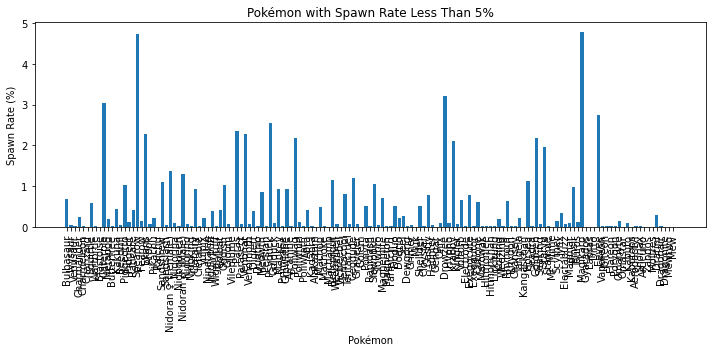

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

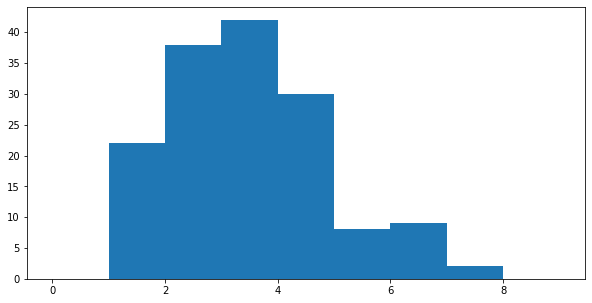

In [165]:
# Ans:-
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Read the Pokémon data from a excel file or create a DataFrame manually
pokemon_data = pd.read_excel('pokemon_data.xlsx')
#print(pokemon_data)

# Function to download and save the Pokémon image
def save_pokemon_image(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

# 1. Get all Pokemons whose spawn rate is less than 5%
low_spawn_rate_pokemon = pokemon_data[pokemon_data['spawn_chance'] < 5]
print("Pokemons with spawn rate less than 5%:")
print(low_spawn_rate_pokemon[['id', 'name', 'spawn_chance']])

 # 2. Get all Pokemons that have less than 4 weaknesses
few_weaknesses_pokemon = pokemon_data[pokemon_data['weaknesses'].str.split(',').apply(len) < 4]
print("Pokemons with less than 4 weaknesses:")
print(few_weaknesses_pokemon[['id', 'name', 'weaknesses']]) 

# 3. Get all Pokemons that have no multipliers at all
no_multipliers_pokemon = pokemon_data[pokemon_data['multipliers'].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers_pokemon[['id', 'name', 'multipliers']])

# 4. Get all Pokemons that do not have more than 2 evolutions
few_evolutions_pokemon = pokemon_data[pokemon_data['next_evolution'].isnull() & pokemon_data['prev_evolution'].isnull()]
print("Pokemons with no more than 2 evolutions:")
print(few_evolutions_pokemon[['id', 'name', 'next_evolution', 'prev_evolution']])

# 5. Get all Pokemons whose spawn time is less than 300 seconds
def convert_spawn_time_to_seconds(time):
    if isinstance(time, float):
        return 0
    minutes, seconds = map(int, time.split(':'))
    return minutes * 60 + seconds

pokemon_data['spawn_time_seconds'] = pokemon_data['spawn_time'].apply(convert_spawn_time_to_seconds)
fast_spawn_pokemon = pokemon_data[pokemon_data['spawn_time_seconds'] < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(fast_spawn_pokemon[['id', 'name', 'spawn_time_seconds']])

# 6. Get all Pokemon who have more than two types of capabilities
def count_capabilities(types):
    return len(types.split(','))

pokemon_data['capability_count'] = pokemon_data['type'].apply(count_capabilities)
multiple_capabilities_pokemon = pokemon_data[pokemon_data['capability_count'] > 2]
print("Pokemons with more than two types of capabilities:")
print(multiple_capabilities_pokemon[['id', 'name', 'type']])

# Draw plots for better visualizations

# Plot for spawn rate analysis
plt.figure(figsize=(10, 5))
plt.bar(low_spawn_rate_pokemon['name'], low_spawn_rate_pokemon['spawn_chance'])
plt.xlabel('Pokémon')
plt.ylabel('Spawn Rate (%)')
plt.title('Pokémon with Spawn Rate Less Than 5%')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot for weaknesses analysis
plt.figure(figsize=(10, 5))
pokemon_data['weakness_count'] = pokemon_data['weaknesses'].str.split(',').apply(len)
plt.hist(pokemon_data['weakness_count'], bins=range(0, 10))
plt.xlabel


# Question 7
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

Earth meteorites that fell before the year 2000:
Empty DataFrame
Columns: [name, id, nametype, recclass, mass, year, reclat, reclong]
Index: []
Earth meteorites' coordinates that fell before the year 1970:
Empty DataFrame
Columns: [reclat, reclong]
Index: []
Earth meteorites with a mass greater than 10000 kg:
Empty DataFrame
Columns: [name, id, nametype, recclass, mass, year, reclat, reclong]
Index: []


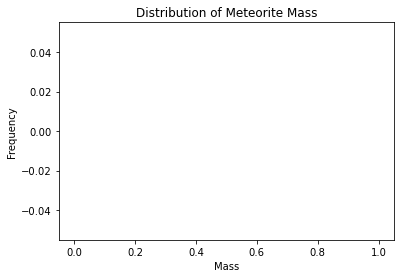

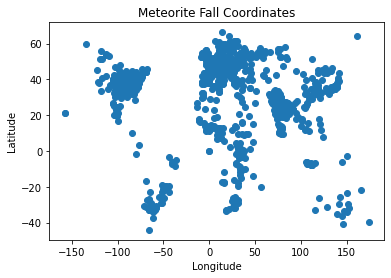

In [173]:
# Ans:-
import pandas as pd
import matplotlib.pyplot as plt

# Insert data 
df = pd.read_csv("processed_data.csv")

# Convert 'year' column to datetime if it is a string representation of datetime objects
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# 1. Get all Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['year'].dt.year < 2000]
print("Earth meteorites that fell before the year 2000:")
print(earth_meteorites_before_2000)

# 2. Get all Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = df[df['year'].dt.year < 1970]
print("Earth meteorites' coordinates that fell before the year 1970:")
print(earth_meteorites_before_1970[['reclat', 'reclong']])

# 3. Get all Earth meteorites with a mass greater than 10000 kg
earth_meteorites_high_mass = df[df['mass'] > 10000]
print("Earth meteorites with a mass greater than 10000 kg:")
print(earth_meteorites_high_mass)

# Plots

# Histogram of meteorite masses
df['mass'].plot.hist(bins=10)
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('Distribution of Meteorite Mass')
plt.show()

# Scatter plot of meteorite coordinates
plt.scatter(df['reclong'], df['reclat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Fall Coordinates')
plt.show()

In [174]:
processed_data

[{'name': 'Aachen',
  'id': '1',
  'nametype': 'Valid',
  'recclass': 'L5',
  'mass': None,
  'year': <attribute 'year' of 'datetime.date' objects>,
  'reclat': 50.775,
  'reclong': 6.08333},
 {'name': 'Aarhus',
  'id': '2',
  'nametype': 'Valid',
  'recclass': 'H6',
  'mass': None,
  'year': <attribute 'year' of 'datetime.date' objects>,
  'reclat': 56.18333,
  'reclong': 10.23333},
 {'name': 'Abee',
  'id': '6',
  'nametype': 'Valid',
  'recclass': 'EH4',
  'mass': None,
  'year': <attribute 'year' of 'datetime.date' objects>,
  'reclat': 54.21667,
  'reclong': -113.0},
 {'name': 'Acapulco',
  'id': '10',
  'nametype': 'Valid',
  'recclass': 'Acapulcoite',
  'mass': None,
  'year': <attribute 'year' of 'datetime.date' objects>,
  'reclat': 16.88333,
  'reclong': -99.9},
 {'name': 'Achiras',
  'id': '370',
  'nametype': 'Valid',
  'recclass': 'L6',
  'mass': None,
  'year': <attribute 'year' of 'datetime.date' objects>,
  'reclat': -33.16667,
  'reclong': -64.95},
 {'name': 'Adhi Kot'

# Question 8 
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

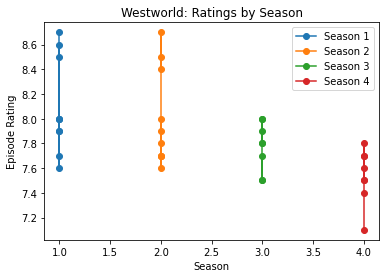

Overall Ratings by Season: [[8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7], [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5], [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7], [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]]
High Rated Episodes: ["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Kiksuya', 'Vanishing Point', 'The Passenger']
Episodes Aired Before May 2019: ['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']
Episodes with Highest Ratings: ['The Bicameral Mind', 'Kiksuya', 'Parce Domine', 'Zhuangzi']
Episodes with Lowest Ratings: ['The Stray', 'Akane No Mai', 'Decoherence', 'The Auguries']
Popular Episode Summaries: ["<p>Delores finds out the truth about William's fate. Meanwhile

In [29]:
# Ans:- 

import requests
import matplotlib.pyplot as plt

# Download the data from the API
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Extract relevant information from the data
episodes = data['_embedded']['episodes']

# Get all unique season numbers
season_numbers = set(episode['season'] for episode in episodes)

# Get all the overall ratings for each season
season_ratings = []
for season in season_numbers:
    season_episodes = [episode for episode in episodes if episode['season'] == season]
    ratings = [episode['rating']['average'] for episode in season_episodes]
    season_ratings.append(ratings)

# Plotting the ratings for all seasons
for season, ratings in zip(season_numbers, season_ratings):
    plt.plot([season] * len(ratings), ratings, marker='o', label=f'Season {season}')
plt.xlabel('Season')
plt.ylabel('Episode Rating')
plt.title('Westworld: Ratings by Season')
plt.legend()
plt.show()

# Get all the episode names with average rating > 8 for every season
high_rated_episodes = []
for season in season_numbers:
    season_episodes = [episode for episode in episodes if episode['season'] == season]
    for episode in season_episodes:
        if episode['rating']['average'] > 8:
            high_rated_episodes.append(episode['name'])

# Get all the episode names that aired before May 2019
early_episodes = []
for episode in episodes:
    if episode['airdate'] < '2019-05':
        early_episodes.append(episode['name'])

# Get the episode name with the highest and lowest rating from each season
highest_rated_episodes = []
lowest_rated_episodes = []
for season in season_numbers:
    season_episodes = [episode for episode in episodes if episode['season'] == season]
    highest_rated_episode = max(season_episodes, key=lambda x: x['rating']['average'])
    lowest_rated_episode = min(season_episodes, key=lambda x: x['rating']['average'])
    highest_rated_episodes.append(highest_rated_episode['name'])
    lowest_rated_episodes.append(lowest_rated_episode['name'])

# Get the summary for the most popular (ratings) episode in every season
popular_episode_summaries = []
for season in season_numbers:
    season_episodes = [episode for episode in episodes if episode['season'] == season]
    popular_episode = max(season_episodes, key=lambda x: x['rating']['average'])
    popular_episode_summaries.append(popular_episode['summary'])

# Print the results
print("Overall Ratings by Season:", season_ratings)
print("High Rated Episodes:", high_rated_episodes)
print("Episodes Aired Before May 2019:", early_episodes)
print("Episodes with Highest Ratings:", highest_rated_episodes)
print("Episodes with Lowest Ratings:", lowest_rated_episodes)
print("Popular Episode Summaries:", popular_episode_summaries)


# Question 9 
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

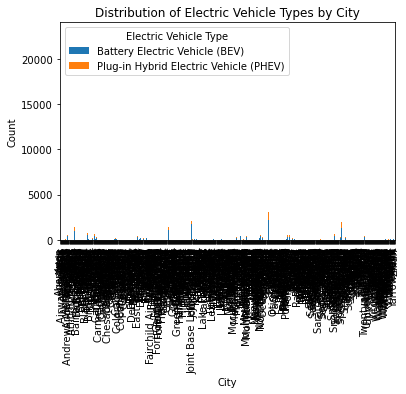

Cars and Types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Type]
Index: []

TESLA cars with Model Year and Model Type made in Bothell City:
Empty DataFrame
Columns: [Model Year]
Index: []

Cars with Electric Range > 100 and made after 2015:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
if 'Qualifies for Clean Alternative Fuel Vehicle' in data.columns:
    non_qualifying_cars = data[data['Qualifies for Clean Alternative Fuel Vehicle'] == 'No']
    non_qualifying_cars_info = non_qualifying_cars[['Make', 'Type']]
    non_qualifying_cars_info.drop_duplicates(inplace=True)
else:
    non_qualifying_cars_info = pd.DataFrame(columns=['Make', 'Type'])

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
tesla_cars_info = tesla_cars_bothell[['Model Year']]

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_high_range = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]

# Draw plots to show the distribution between city and electric vehicle type
if 'City' in data.columns and 'Electric Vehicle Type' in data.columns:
    city_ev_type_distribution = data.groupby(['City', 'Electric Vehicle Type']).size().unstack()
    city_ev_type_distribution.plot(kind='bar', stacked=True)
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.title('Distribution of Electric Vehicle Types by City')
    plt.legend(title='Electric Vehicle Type')
    plt.show()
else:
    print("Cannot create the plot. Required columns are missing.")

# Print the results
print("Cars and Types that do not qualify for clean alternative fuel vehicle:")
print(non_qualifying_cars_info.to_string(index=False))
print("\nTESLA cars with Model Year and Model Type made in Bothell City:")
print(tesla_cars_info.to_string(index=False))
print("\nCars with Electric Range > 100 and made after 2015:")
print(electric_cars_high_range.to_string(index=False))


# Question 10
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.


In [7]:
# Ans:-
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from collections import defaultdict

def count_pos_tags(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)

    # Tag each word with its part of speech
    tagged_words = nltk.pos_tag(tokens)

    # Initialize a defaultdict to store the counts of each POS tag
    pos_counts = defaultdict(int)

    # Iterate over the tagged words and count the occurrences of each POS tag
    for word, tag in tagged_words:
        pos_tag = tag[:2]  # Take the first two characters of the tag to generalize the POS category

        # Check if the POS tag is a verb, noun, pronoun, or adjective
        if pos_tag.startswith('VB'):
            pos_counts['Verbs'] += 1
        elif pos_tag.startswith('NN'):
            pos_counts['Nouns'] += 1
        elif pos_tag.startswith('PR'):
            pos_counts['Pronouns'] += 1
        elif pos_tag.startswith('JJ'):
            pos_counts['Adjectives'] += 1

    return pos_counts

# Test case 1
text1 = "Procurement engineers oversee the purchase of technical equipment for industrial operations. They collaborate with designers to determine the equipment needed to complete manufacturing or construction projects according to specifications, research vendors for that equipment, then order it."
counts1 = count_pos_tags(text1)
print(counts1)

# Test case 2
text2 = " We are happy to let you know that an item from your order has been delivered. You can download a copy of the invoice for item(s) delivered by visiting the below link."
counts2 = count_pos_tags(text2)
print(counts2)

# Test case 3
text3 = "I saw a tall building in the distance."
counts3 = count_pos_tags(text3)
print(counts3)


defaultdict(<class 'int'>, {'Adjectives': 3, 'Nouns': 14, 'Verbs': 6, 'Pronouns': 2})
defaultdict(<class 'int'>, {'Pronouns': 5, 'Verbs': 9, 'Adjectives': 1, 'Nouns': 7})
defaultdict(<class 'int'>, {'Pronouns': 1, 'Verbs': 1, 'Adjectives': 1, 'Nouns': 2})


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
